In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.9.0)


In [2]:
## Importing the necessary packages required for the project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import json
import tweepy
from timeit import default_timer as timer
import glob
import re
import seaborn as sns

### Gathering

In [3]:
## Reading the twitter_ archive-enhnced csv file
df1=pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
df1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
## downloading the html filw with requests library
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
## Saving the HTML to a file
with open ("image-predictions.tsv" , mode= 'wb') as file :
    file.write (response.content)

In [7]:
## Reading the tsv file
imagedf1 = pd.read_csv('image-predictions.tsv',sep ='\t')

In [8]:
imagedf1.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

###### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
###### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Your credentials'
consumer_secret = 'Your credentials'
access_token = 'Your Credentials'
access_secret = 'Your Credentials'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

###### Twitter api code for accessing the data from the Twitter API 
###### Twitter api code will extract information based upon the tweet_id given in the df1
######  df1.tweet_id.values creates an array of all the id values in tweet_id
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df1.tweet_id.values
len(tweet_ids)

###### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
###### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



In [9]:
## Loading the text file
## We are creating an empty list, and opening the the text file with json structure and reading line by line for extracting the data
tweet_api =[]
with open('tweet_json.txt','r') as f:
    for line in f:
        tweet_api.append(json.loads(line))


In [10]:
## Displaying the tweet_api list
tweet_api

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [11]:
##Converting the list into dataframe
tweets_api=pd.DataFrame(tweet_api)

In [12]:
tweets_api

contributors coordinates                      created_at  \
0            None        None  Tue Aug 01 16:23:56 +0000 2017   
1            None        None  Tue Aug 01 00:17:27 +0000 2017   
2            None        None  Mon Jul 31 00:18:03 +0000 2017   
3            None        None  Sun Jul 30 15:58:51 +0000 2017   
4            None        None  Sat Jul 29 16:00:24 +0000 2017   
5            None        None  Sat Jul 29 00:08:17 +0000 2017   
6            None        None  Fri Jul 28 16:27:12 +0000 2017   
7            None        None  Fri Jul 28 00:22:40 +0000 2017   
8            None        None  Thu Jul 27 16:25:51 +0000 2017   
9            None        None  Wed Jul 26 15:59:51 +0000 2017   
10           None        None  Wed Jul 26 00:31:25 +0000 2017   
11           None        None  Tue Jul 25 16:11:53 +0000 2017   
12           None        None  Tue Jul 25 01:55:32 +0000 2017   
13           None        None  Tue Jul 25 00:10:02 +0000 2017   
14           None        None  Mon Jul 24 17:02:04 +0000 2017   
15           None        None  Mon Jul 24 00:19:32 +0000 2017   
16           None        None  Sun Jul 23 00:22:39 +0000 2017   
17           None        None  Sat Jul 22 16:56:37 +0000 2017   
18           None        None  Sat Jul 22 00:23:06 +0000 2017   
19           None        None  Thu Jul 20 16:49:33 +0000 2017   
20           None        None  Wed Jul 19 16:06:48 +0000 2017   
21           None        None  Wed Jul 19 03:39:09 +0000 2017   
22           None        None  Wed Jul 19 00:47:34 +0000 2017   
23           None        None  Tue Jul 18 16:08:03 +0000 2017   
24           None        None  Tue Jul 18 00:07:08 +0000 2017   
25           None        None  Mon Jul 17 16:17:36 +0000 2017   
26           None        None  Sun Jul 16 23:58:41 +0000 2017   
27           None        None  Sun Jul 16 20:14:00 +0000 2017   
28           None        None  Sat Jul 15 23:25:31 +0000 2017   
29           None        None  Sat Jul 15 16:51:35 +0000 2017   
...           ...         ...                             ...   
2324         None        None  Tue Nov 17 00:53:15 +0000 2015   
2325         None        None  Tue Nov 17 00:24:19 +0000 2015   
2326         None        None  Mon Nov 16 23:23:41 +0000 2015   
2327         None        None  Mon Nov 16 21:54:18 +0000 2015   
2328         None        None  Mon Nov 16 21:10:36 +0000 2015   
2329         None        None  Mon Nov 16 20:32:58 +0000 2015   
2330         None        None  Mon Nov 16 20:01:42 +0000 2015   
2331         None        None  Mon Nov 16 19:31:45 +0000 2015   
2332         None        None  Mon Nov 16 16:37:02 +0000 2015   
2333         None        None  Mon Nov 16 16:11:11 +0000 2015   
2334         None        None  Mon Nov 16 15:14:19 +0000 2015   
2335         None        None  Mon Nov 16 14:57:41 +0000 2015   
2336         None        None  Mon Nov 16 04:02:55 +0000 2015   
2337         None        None  Mon Nov 16 03:55:04 +0000 2015   
2338         None        None  Mon Nov 16 03:44:34 +0000 2015   
2339         None        None  Mon Nov 16 03:22:39 +0000 2015   
2340         None        None  Mon Nov 16 02:38:37 +0000 2015   
2341         None        None  Mon Nov 16 01:59:36 +0000 2015   
2342         None        None  Mon Nov 16 01:52:02 +0000 2015   
2343         None        None  Mon Nov 16 01:22:45 +0000 2015   
2344         None        None  Mon Nov 16 01:01:59 +0000 2015   
2345         None        None  Mon Nov 16 00:55:59 +0000 2015   
2346         None        None  Mon Nov 16 00:49:46 +0000 2015   
2347         None        None  Mon Nov 16 00:35:11 +0000 2015   
2348         None        None  Mon Nov 16 00:30:50 +0000 2015   
2349         None        None  Mon Nov 16 00:24:50 +0000 2015   
2350         None        None  Mon Nov 16 00:04:52 +0000 2015   
2351         None        None  Sun Nov 15 23:21:54 +0000 2015   
2352         None        None  Sun Nov 15 23:05:30 +0000 2015   
2353         None        None  Sun Nov 1

In [13]:
## Selecting only the columns required for analysis
tweets_api=tweets_api.loc[:,['id','favorite_count','retweet_count']]

In [14]:
## Displaying the dataframe
tweets_api.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

### Assessing

In [15]:
df1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [16]:
##df1 we can see the completeness issues
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We can see that there are lot of null items tin in_reply_to_status_id,in_reply_to_user_id, retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp and there are some missing values in expanded_urls.Sometimes we can correct the compelteness issues but getting together with the stakeholders and soemtimes we have to leave it behind because we don't have any data source to extract data. But in this case we won't be using these columns so we will be removing these columns from the table

In [17]:
sum(df1['retweeted_status_id'].notnull())

181

Remove retweeted_status_id (181 columns) as we are only interested in original tweet

In [18]:
type(df1['timestamp'][0])

str

In [19]:
type(df1['tweet_id'][0])

numpy.int64

Time in df1 dataframe is string we need to convert time into timestamp for anlysis, tweet_id should be a string

In [20]:
df1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [21]:
df1['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [22]:
df1['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Buddy          7
Daisy          7
Bailey         7
Rusty          6
Jack           6
Bella          6
Koda           6
Leo            6
Oscar          6
Jax            6
Stanley        6
Scout          6
Milo           6
Dave           6
George         5
            ... 
Ralphy         1
Oreo           1
Eazy           1
Rizzo          1
Keet           1
Carll          1
Crawford       1
Kona           1
Blue           1
Ulysses        1
Reptar         1
Halo           1
Barney         1
Dunkin         1
Filup          1
Ralpher        1
Puff           1
Karl           1
Gert           1
Edd            1
Milky          1
Enchilada      1
Harvey         1
Tyrus          1
Harlso         1
Remy           1
Cilantro       1
Darby         

In [23]:
## Checking if there are any names in lower case
df1.name[df1.name.str.islower()]

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

his, a,the,a,an,quite,such and none should not be in name

In [24]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
## The information about the source is in the url// and is not easily readible

In [26]:
## There are lot of none values in the dataframe

In [27]:
df1['expanded_urls'].head(20)

0     https://twitter.com/dog_rates/status/892420643...
1     https://twitter.com/dog_rates/status/892177421...
2     https://twitter.com/dog_rates/status/891815181...
3     https://twitter.com/dog_rates/status/891689557...
4     https://twitter.com/dog_rates/status/891327558...
5     https://twitter.com/dog_rates/status/891087950...
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...
7     https://twitter.com/dog_rates/status/890729181...
8     https://twitter.com/dog_rates/status/890609185...
9     https://twitter.com/dog_rates/status/890240255...
10    https://twitter.com/dog_rates/status/890006608...
11    https://twitter.com/dog_rates/status/889880896...
12    https://twitter.com/dog_rates/status/889665388...
13    https://twitter.com/dog_rates/status/889638837...
14    https://twitter.com/dog_rates/status/889531135...
15    https://twitter.com/dog_rates/status/889278841...
16    https://twitter.com/dog_rates/status/888917238...
17    https://twitter.com/dog_rates/status/88880

In [28]:
df1.expanded_urls[df1.expanded_urls.isna()].shape

(59,)

In [29]:
## Missing values in exapnded url(59)

In [30]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
df1.query('rating_numerator == 1776')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
979  749981277374128128                    NaN                  NaN   

                     timestamp  \
979  2016-07-04 15:00:45 +0000   

                                                source  \
979  <a href="https://about.twitter.com/products/tw...   

                                                  text  retweeted_status_id  \
979  This is Atticus. He's quite simply America af....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
979                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
979  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  
979                  10  Atticus  None    None   None  None

In [33]:
## Incorrect data for the denominator --> the denominator have values other than 10

In [34]:
## Visual Assessment
imagedf1.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [35]:
imagedf1.tail(20)

tweet_id                                            jpg_url  \
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg   
2064  890006608113172480    https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg   
2065  890240255349198849    https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
2066  890609185150312448    https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888    https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2068  890971913173991426    https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856    https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864    https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426    https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                        p1   p1_conf  p1_dog  \
2055        2                  Pembroke  0.809197    True   
2056        3            Siberian_husky  0.700377    True   
2057        1          golden_retriever  0.469760    True   
2058        1          golden_retriever  0.714719    True   
2059        1                   whippet  0.626152    True   
2060        1          golden_retriever  0.953442    True   
2061        1            French_bulldog  0.991650    True   
2062        1                  Pembroke  0.966327    True   
2063        1            French_bulldog  0.377417    True   
2064        1                   Samoyed  0.957979    True   
2065        1                  Pembroke  0.511319    True   
2066        1             Irish_terrier  0.487574    True   
2067        2                Pomeranian  0.566142    True   
2068        1               Appenzeller  0.341703    True   
2069        1  Chesapeake_Bay_retriever  0.425595    True   
2070        2                    basset  0.555712    True   
2071        1               paper_towel  0.170278   False   
2072        1                 Chihuahua  0.716012    True   
2073        1                 Chihuahua  0.323581    True   
2074        1                    orange  0.097049   False   

                       p2   p2_conf  p2_dog                           p3  \
2055  Rhodesian_ridgeback  0.054950    True                       beagle   
2056           Eskimo_dog  0.166511    True                     malamute   
2057   Labrador_retriever  0.184172    True               English_setter   
2058      Tibetan_mastiff  0.120184    True           Labrador_retriever   
2059               borzoi  0.194742    True                       Saluki   
2060   Labrador_retriever  0.013834    True                      redbone   
2061                boxer  0.002129    True    Staffordshire_bullterrier   
2062             Cardigan  0.027356    True                      basenji   
2063   Labrador_retriever  0.151317    True                       muzzle   
2064           Pomeranian  0.013884    True                         chow   
2065             Cardigan  0.451038    True                    Chihuahua   
2066         Irish_setter  0.193054    True     Chesapeake_Bay_retriever   
2067           Eskimo_dog  0.178406    True                     Pembroke   
2068      

In [36]:
imagedf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
## there are no null values but the total count of twitter data is 2356(suspect that 281 records might be retweeted)

In [38]:
## The column not informative (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog)

In [39]:
imagedf1['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [40]:
## the dog names in the p1_column are in upper and lower case

In [41]:
imagedf1['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
malinois                           20
toy_terrier                        20
Samoyed                            20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [42]:
## the dog names in column p2 are in upper and lower case

In [43]:
imagedf1['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [44]:
## the dog names in column p3 are in upper and lower case

In [45]:
## Checking for duplicate tweet_id column
imagedf1.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [46]:
## there are no duplicated tweet_id's

In [47]:
##Checking for duplicated url
imagedf1[imagedf1['jpg_url'].duplicated()]

tweet_id                                            jpg_url  \
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1315  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349  759566828574212096    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
1364  761371037149827077  https://pbs.twimg.com/tweet_video_thumb/CeBym7...   
1368  761750502866649088    https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
1387  766078092750233600    https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg   
1407  770093767776997377    https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
1417  771171053431250945    https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   
1427  772615324260794368    https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg   
1446  775898661951791106    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
1453  776819012571455488    https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg   
1456  777641927919427584    https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg   
1463  778396591732486144    https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg   
1476  780496263422808064    https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1487  782021823840026624    https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg   
1495  783347506784731136    https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   
1510  786036967502913536    https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg   
1522  788070120937619456    https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
1538  790723298204217344    https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1541  791026214425268224    https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg   
1564  793614319594401792    https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg   
1569  794355576146903043    https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg   
1571  794983741416415232    https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg   
1579  796177847564038144    https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
1588  798340744599797760    https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg   
1589  798628517273620480    https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
1590  798644042770751489    https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg   
1591  798665375516884993    https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
...                  ...                                                ...   
1619  802624713319034886    https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg   
1624  803692223237865472    https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg   
1627  804413760345620481    https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg   
1634  805958939288408065    https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg   
1636  806242860592926720    https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg   
1640  807059379405148160    https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg   
1645  808134635716833280    https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1652  809808892968534016    https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg   
1683  813944609378369540    https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg   
1693  816014286006976512    https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg   
1699  816829038950027264    https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg   
1703  817181837579653120  https://pbs.twimg.com/ext_tw_video_thumb/81596...   
1712  818588835076603904    https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg   
1717  819015331746349057    https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg   
1718  819015337530290176    https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   
1727  820446719150292993    https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg   
1736  821813639212650496    https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg   
1742  822647212903690241    https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg   
1746  823269594223824897    https://pbs.twimg.com/media/C2kzTGxWEA

In [48]:
## There are 66 duplicated columns for the jpg url

In [49]:
## Checking for common columns in df1 and imagedf1 columns
two_columns= pd.Series(list(df1)+list(imagedf1))
two_columns[two_columns.duplicated()]

17    tweet_id
dtype: object

In [50]:
## tweet_id is the common column in both the dataset

### Tweets_api

In [51]:
tweets_api.head(20)

id  favorite_count  retweet_count
0   892420643555336193           39467           8853
1   892177421306343426           33819           6514
2   891815181378084864           25461           4328
3   891689557279858688           42908           8964
4   891327558926688256           41048           9774
5   891087950875897856           20562           3261
6   890971913173991426           12041           2158
7   890729181411237888           56848          16716
8   890609185150312448           28226           4429
9   890240255349198849           32467           7711
10  890006608113172480           31166           7624
11  889880896479866881           28268           5156
12  889665388333682689           38818           8538
13  889638837579907072           27672           4735
14  889531135344209921           15359           2321
15  889278841981685760           25652           5637
16  888917238123831296           29611           4709
17  888804989199671297           26080           4559
18  888554962724278272           20290           3732
19  888078434458587136           22201           3653

In [52]:
tweets_api.tail(20)

id  favorite_count  retweet_count
2334  666273097616637952             184             82
2335  666268910803644416             108             37
2336  666104133288665088           14765           6871
2337  666102155909144576              81             16
2338  666099513787052032             164             73
2339  666094000022159362             169             79
2340  666082916733198337             121             47
2341  666073100786774016             335            174
2342  666071193221509120             154             67
2343  666063827256086533             496            232
2344  666058600524156928             115             61
2345  666057090499244032             304            146
2346  666055525042405380             448            261
2347  666051853826850816            1253            879
2348  666050758794694657             136             60
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

In [53]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [54]:
tweets_api.favorite_count.value_counts().sort_values()

19163      1
1817       1
3864       1
262        1
1813       1
1096       1
9997       1
3852       1
1803       1
5897       1
3848       1
1799       1
1526       1
565        1
7938       1
857        1
8910       1
2441       1
20208      1
7916       1
1771       1
3818       1
9959       1
7908       1
1763       1
1761       1
28382      1
14081      1
10085      1
1208       1
        ... 
13755      2
1674       2
4578       2
2384       2
1074       2
8209       2
2906       2
327        2
3999       2
2046       2
20275      2
8945       2
2370       2
4228       2
2044       2
2979       2
1253       2
5792       2
592        2
496        2
931        2
610        3
345        3
2918       3
1339       3
2176       3
2768       3
2706       3
1691       3
0        179
Name: favorite_count, Length: 2007, dtype: int64

In [55]:
tweets_api['retweet_count'].value_counts().sort_values()

274      1
2610     1
561      1
2608     1
4653     1
2602     1
479      1
1055     1
547      1
6690     1
4637     1
563      1
1059     1
537      1
535      1
27680    1
477      1
3130     1
475      1
11330    1
4533     1
433      1
429      1
2586     1
565      1
5159     1
366      1
4598     1
1149     1
285      1
        ..
231      3
888      3
119      3
896      3
135      3
836      3
792      3
776      3
426      3
4319     3
1225     3
183      4
146      4
61       4
748      4
2243     4
336      4
179      4
819      4
265      4
115      4
71       4
1124     4
542      4
577      4
516      4
1207     4
83       5
3652     5
1972     5
Name: retweet_count, Length: 1724, dtype: int64

In [56]:
sum(tweets_api['id'].duplicated())

0

In [57]:
## Change the id column to tweet_id (only for remembering)

In [58]:
tweets_api.rename(columns={'id': 'tweet_id'},inplace=True)

#### Observations

#### Tideness issues
1. There should only one table for imagedf1,tweet_json,df1(twitter_archive)
2. The columns doggo,pupper,floofer, puppo should be one column (type)


##### Quality issues
twitter_archive(df1)
1. Null Values (in_reply_to_status_id,in_reply_to_user_id, retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp ) as they are not required for analysis and they have a lot of null values
2. Remove the 181 values in retweeted_status_id as we are only interested in original tweets
3. Erroneous data timestamp (It is in string format)
4. Wrong Denominator rating (There is denominator rating other than 10)
5. The exapnded_url has some missing values, the url with missing values; means that there are no images and we should not be using the data with missing url's
6. Incorrect dog names (vowels and other conjusction's in dog name)
7. There are a lot of none values in dog type's (puppo,doggo,floofer,doggo,pupper)
8. url not into human readible form

image_prediction(imagedf1)
1. The column names p1,p2,p3 are not very informative
2. The dog type have uppercase and lowercase names





### Cleaning

During the cleaning process the first part is tackle the Tideness issues and then the quality issues

In [59]:
## Making the copy of the dataframes
df1_clean          = df1.copy()
imagedf1_clean     = imagedf1.copy()
tweets_api_clean   = tweets_api.copy()

In [60]:
##Checking
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [61]:
imagedf1_clean.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

In [62]:
tweets_api_clean.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

##### Define
1. Make the columns doggo,floofer, pupper, puppo into one column using pandas melt feature

##### Code

In [63]:
df1_clean= pd.melt(df1_clean,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
                   ,'expanded_urls','rating_numerator','rating_denominator','name'] ,
        value_vars=['doggo','floofer','pupper','puppo'],var_name='stages',value_name='dog_stages')

In [64]:
df1_clean.drop('stages',axis=1,inplace=True)

In [65]:
### Checking for duplicated values
sum(df1_clean.duplicated())

6674

In [66]:
### Removing duplicated values 
df1_clean.drop_duplicates(inplace=True)

##### Testing

In [67]:
df1_clean.shape

(2750, 14)

In [68]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  
0                  10   Phineas       None  
1                  10     Tilly       None  
2                  10    Archie       None  
3                  10     Darla       None  
4                  10  Franklin       None

In [69]:
df1_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2189  668967877119254528           6.689207e+17           21435658.0   
971   750101899009982464                    NaN                  NaN   
682   788552643979468800                    NaN                  NaN   
1181  719332531645071360                    NaN                  NaN   
1739  679511351870550016                    NaN                  NaN   

                      timestamp  \
2189  2015-11-24 01:42:25 +0000   
971   2016-07-04 23:00:03 +0000   
682   2016-10-19 01:29:35 +0000   
1181  2016-04-11 01:13:34 +0000   
1739  2015-12-23 03:58:25 +0000   

                                                 source  \
2189  <a href="http://twitter.com/download/iphone" r...   
971   <a href="http://twitter.com/download/iphone" r...   
682   <a href="http://twitter.com/download/iphone" r...   
1181  <a href="http://twitter.com/download/iphone" r...   
1739  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2189                     12/10 good shit Bubka\n@wane15                  NaN   
971   Meet Lilah. She agreed on one quick pic. Now s...                  NaN   
682   RT @dog_rates: Say hello to mad pupper. You kn...         7.363926e+17   
1181  This is Pippa. She managed to start the car bu...                  NaN   
1739  Say hello to William. He makes fun of others b...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2189                       NaN                        NaN   
971                        NaN                        NaN   
682               4.196984e+09  2016-05-28 03:04:00 +0000   
1181                       NaN                        NaN   
1739                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2189                                                NaN                12   
971   https://twitter.com/dog_rates/status/750101899...                11   
682   https://vine.co/v/iEggaEOiLO3,https://vine.co/...                13   
1181  https://twitter.com/dog_rates/status/719332531...                11   
1739  https://twitter.com/dog_rates/status/679511351...                 7   

      rating_denominator     name dog_stages  
2189                  10     None       None  
971                   10    Lilah       None  
682                   10      mad       None  
1181                  10    Pippa       None  
1739                  10  William       None

#### Define
1. Merge all the dataframes and make them into one dataframe name it as twitter_master_clean

##### Code

In [70]:
## Creating an abc dataframe by merging df1_clean and imagedf1_clean
abc =pd.merge(df1_clean,imagedf1_clean,on='tweet_id',how='inner')

In [71]:
### Merging the abc dataframe with tweet_json to make on dataframe twitter_master_clean
twitter_master_clean = pd.merge(abc,tweets_api_clean,on='tweet_id',how='inner')

##### Testing

In [72]:
abc.shape

(2409, 25)

In [73]:
abc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [74]:
twitter_master_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      ...        p1_conf  \
0  https://twitter.com/dog_rates/status/892420643...      ...       0.097049   
1  https://twitter.com/dog_rates/status/892177421...      ...       0.323581   
2  https://twitter.com/dog_rates/status/891815181...      ...       0.716012   
3  https://twitter.com/dog_rates/status/891689557...      ...       0.170278   
4  https://twitter.com/dog_rates/status/891327558...      ...       0.555712   

   p1_dog                  p2   p2_conf p2_dog                           p3  \
0   False               bagel  0.085851  False                       banana   
1    True            Pekinese  0.090647   True                     papillon   
2    True            malamute  0.078253   True                       kelpie   
3   False  Labrador_retriever  0.168086   True                      spatula   
4    True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf  p3_dog  favorite_count retweet_count  
0  0.076110   False           39467          8853  
1  0.068957    True           33819          6514  
2  0.031379    True           25461          4328  
3  0.040836   False           42908          8964  
4  0.175219    True           41048          9774  

[5 rows x 27 columns]

In [75]:
twitter_master_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [76]:
twitter_master_clean.shape

(2406, 27)

#### Quality

##### Define

Filter the tweet_master_clean dataframe to remove the 181 values in retweeted_status_id as we are only interested in original tweets

#### Code

In [77]:
## Checting for null values. Instead of 181, 95 values are left because of the merge operations
sum(twitter_master_clean.retweeted_status_id.notnull())

95

In [78]:
twitter_master_clean.drop(twitter_master_clean[twitter_master_clean.retweeted_status_id.notnull()].index,inplace=True)

#### Testing

In [79]:
twitter_master_clean.shape

(2311, 27)

In [80]:
sum(twitter_master_clean.retweeted_status_id.notnull())

0

Define

1. Dropping the columns not required for ananlysis ( (in_reply_to_status_id,in_reply_to_user_id, retweeted_status_user_id,retweeted_status_user_id,retweeted_status_timestamp )

In [81]:
#### Code

In [82]:
twitter_master_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [83]:
twitter_master_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_user_id',
                           'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [84]:
## Dropping retweeted_status_id
twitter_master_clean.drop('retweeted_status_id',axis=1,inplace=True)

In [85]:
#### Testing
twitter_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

In [86]:
twitter_master_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   Phineas       None   
1                  10     Tilly       None   
2                  10    Archie       None   
3                  10     Darla       None   
4                  10  Franklin       None   

                                           jpg_url      ...         p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      ...        0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      ...        0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      ...        0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      ...        0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      ...        0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            Pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  Labrador_retriever  0.168086   True                      spatula   
4   True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  favorite_count  retweet_count  
0  0.076110  False           39467           8853  
1  0.068957   True           33819           6514  
2  0.031379   True           25461           4328  
3  0.040836  False           42908           8964  
4  0.175219   True           41048           9774  

[5 rows x 22 columns]

#### Define
1. Converting timestamp into date and time format from string


##### Code

In [87]:
twitter_master_clean['timestamp'] = pd.to_datetime(twitter_master_clean['timestamp'])

#### Testing

In [88]:
type(twitter_master_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [89]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2405
Data columns (total 22 columns):
tweet_id              2311 non-null int64
timestamp             2311 non-null datetime64[ns]
source                2311 non-null object
text                  2311 non-null object
expanded_urls         2311 non-null object
rating_numerator      2311 non-null int64
rating_denominator    2311 non-null int64
name                  2311 non-null object
dog_stages            2311 non-null object
jpg_url               2311 non-null object
img_num               2311 non-null int64
p1                    2311 non-null object
p1_conf               2311 non-null float64
p1_dog                2311 non-null bool
p2                    2311 non-null object
p2_conf               2311 non-null float64
p2_dog                2311 non-null bool
p3                    2311 non-null object
p3_conf               2311 non-null float64
p3_dog                2311 non-null bool
favorite_count        2311 non-n

#### Define
1. Create the list of incorrect name entries and replace them with 'NG'(Not_Given) and then converting every name into lowercase

#### Code

In [90]:
name_1 = ['his','a','the','an','quite','such','None']
for name in name_1:
    twitter_master_clean['name'].replace(name,'NG',inplace=True)


In [91]:
### Converting all the names in lower case
twitter_master_clean['name']=twitter_master_clean.name.str.lower()

#### Testing

In [92]:
twitter_master_clean['name'].head()

0     phineas
1       tilly
2      archie
3       darla
4    franklin
Name: name, dtype: object

In [93]:
twitter_master_clean['name'].tail()

2401    ng
2402    ng
2403    ng
2404    ng
2405    ng
Name: name, dtype: object

In [94]:
twitter_master_clean.name.sample(5)

1729        hector
1807            ng
2123      clarence
1130            ng
865     brandonald
Name: name, dtype: object

#### Define

Replacing the none values in dog_stages np.nan

#### Code

In [95]:
twitter_master_clean.dog_stages.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [96]:
twitter_master_clean.dog_stages.replace('None',np.nan,inplace=True)

#### Testing

In [97]:
twitter_master_clean.dog_stages.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stages, dtype: int64

In [98]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2405
Data columns (total 22 columns):
tweet_id              2311 non-null int64
timestamp             2311 non-null datetime64[ns]
source                2311 non-null object
text                  2311 non-null object
expanded_urls         2311 non-null object
rating_numerator      2311 non-null int64
rating_denominator    2311 non-null int64
name                  2311 non-null object
dog_stages            317 non-null object
jpg_url               2311 non-null object
img_num               2311 non-null int64
p1                    2311 non-null object
p1_conf               2311 non-null float64
p1_dog                2311 non-null bool
p2                    2311 non-null object
p2_conf               2311 non-null float64
p2_dog                2311 non-null bool
p3                    2311 non-null object
p3_conf               2311 non-null float64
p3_dog                2311 non-null bool
favorite_count        2311 non-nu

#### Define
1. Extract the source from the source url and add it in human readible form

#### Code

In [99]:
twitter_master_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2269
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       29
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      13
Name: source, dtype: int64

In [100]:
twitter_master_clean['source']=twitter_master_clean.source.apply(lambda i : re.findall(r'>(.*)<',i)[0])

#### Testing

In [101]:
twitter_master_clean.source.value_counts()

Twitter for iPhone    2269
Twitter Web Client      29
TweetDeck               13
Name: source, dtype: int64

#### Define
1. Filter the values that does not have denomitor equal to 10 and then check the details in the text column and correct the values in rating_denominator column

#### Code 

In [102]:
twitter_master_clean[twitter_master_clean.rating_denominator != 10]

tweet_id           timestamp              source  \
407   820690176645140481 2017-01-15 17:52:40  Twitter for iPhone   
495   810984652412424192 2016-12-19 23:06:23  Twitter for iPhone   
866   758467244762497024 2016-07-28 01:00:57  Twitter for iPhone   
1044  740373189193256964 2016-06-08 02:41:38  Twitter for iPhone   
1104  731156023742988288 2016-05-13 16:15:54  Twitter for iPhone   
1157  722974582966214656 2016-04-21 02:25:47  Twitter for iPhone   
1197  716439118184652801 2016-04-03 01:36:11  Twitter for iPhone   
1219  713900603437621249 2016-03-27 01:29:02  Twitter for iPhone   
1246  710658690886586372 2016-03-18 02:46:49  Twitter for iPhone   
1265  709198395643068416 2016-03-14 02:04:08  Twitter for iPhone   
1341  704054845121142784 2016-02-28 21:25:30  Twitter for iPhone   
1430  697463031882764288 2016-02-10 16:51:59  Twitter for iPhone   
1641  684225744407494656 2016-01-05 04:11:44  Twitter for iPhone   
1642  684222868335505415 2016-01-05 04:00:18  Twitter for iPhone   
1674  682962037429899265 2016-01-01 16:30:13  Twitter for iPhone   
1802  677716515794329600 2015-12-18 05:06:23  Twitter for iPhone   
1871  675853064436391936 2015-12-13 01:41:41  Twitter for iPhone   
2385  666287406224695296 2015-11-16 16:11:11  Twitter for iPhone   

                                                   text  \
407   The floofs have been released I repeat the flo...   
495   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
866   Why does this never happen at my front door......   
1044  After so many requests, this is Bretagne. She ...   
1104  Say hello to this unbelievably well behaved sq...   
1157  Happy 4/20 from the squad! 13/10 for all https...   
1197  This is Bluebert. He just saw that both #Final...   
1219  Happy Saturday here's 9 puppers on a bench. 99...   
1246  Here's a brigade of puppers. All look very pre...   
1265  From left to right:\nCletus, Jerome, Alejandro...   
1341  Here is a whole flock of puppers.  60/50 I'll ...   
1430  Happy Wednesday here's a bucket of pups. 44/40...   
1641  Two sneaky puppers were not initially seen, mo...   
1642  Someone help the girl is being mugged. Several...   
1674  This is Darrel. He just robbed a 7/11 and is i...   
1802  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1871  Here we have an entire platoon of puppers. Tot...   
2385  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
407   https://twitter.com/dog_rates/status/820690176...                84   
495   https://www.gofundme.com/sams-smile,https://tw...                24   
866   https://twitter.com/dog_rates/status/758467244...               165   
1044  https://twitter.com/dog_rates/status/740373189...                 9   
1104  https://twitter.com/dog_rates/status/731156023...               204   
1157  https://twitter.com/dog_rates/status/722974582...                 4   
1197  https://twitter.com/dog_rates/status/716439118...                50   
1219  https://twitter.com/dog_rates/status/713900603...                99   
1246  https://twitter.com/dog_rates/status/710658690...                80   
1265  https://twitter.com/dog_rates/status/709198395...                45   
1341  https://twitter.com/dog_rates/status/704054845...                60   
1430  https://twitter.com/dog_rates/status/697463031...                44   
1641  https://twitter.com/dog_rates/status/684225744...               143   
1642  https://twitter.com/dog_rates/status/684222868...               121   
1674  https://twitter.com/dog_rates/status/682962037...                 7   
1802  https://twitter.com/dog_rates/status/677716515...               144   
1871  https://twitter.com/dog_rates/status/675853064...                88   
2385  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator      name dog_stages  \
407                   70        ng        NaN   
495                    7       sam     

In [103]:
d= twitter_master_clean.copy()

In [104]:
for n in twitter_master_clean['rating_denominator']:
    if n > 10 or n < 10:
        twitter_master_clean['rating_denominator'].replace(n,10,inplace=True)
    else:
        twitter_master_clean['rating_denominator']

#### Testing

In [105]:
twitter_master_clean[twitter_master_clean.rating_denominator != 10]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stages, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count]
Index: []

[0 rows x 22 columns]

In [106]:
twitter_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2405
Data columns (total 22 columns):
tweet_id              2311 non-null int64
timestamp             2311 non-null datetime64[ns]
source                2311 non-null object
text                  2311 non-null object
expanded_urls         2311 non-null object
rating_numerator      2311 non-null int64
rating_denominator    2311 non-null int64
name                  2311 non-null object
dog_stages            317 non-null object
jpg_url               2311 non-null object
img_num               2311 non-null int64
p1                    2311 non-null object
p1_conf               2311 non-null float64
p1_dog                2311 non-null bool
p2                    2311 non-null object
p2_conf               2311 non-null float64
p2_dog                2311 non-null bool
p3                    2311 non-null object
p3_conf               2311 non-null float64
p3_dog                2311 non-null bool
favorite_count        2311 non-nu

In [107]:
### Checking if the shape of twitter_master_clean values ==10 has same number of row values
twitter_master_clean[twitter_master_clean.rating_denominator == 10].shape[0]

2311

#### Define
Change the type of tweet_id from int64 to string because the id's should be string and we won't be using it for analysis

#### Code

In [108]:
type(twitter_master_clean.tweet_id[0])

numpy.int64

In [109]:
twitter_master_clean.tweet_id = twitter_master_clean.tweet_id.astype('str')

#### Testing

In [110]:
type(twitter_master_clean.tweet_id[0])

str

#### Define

Change the names in p1, p2, p3, in lower case

#### Code

In [111]:
s=['p1','p2','p3']
for n in s:
    twitter_master_clean[n]=twitter_master_clean[n].str.lower()

#### Testing

In [112]:
twitter_master_clean.p1.head()

0         orange
1      chihuahua
2      chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object

In [113]:
twitter_master_clean.p2.head()

0                 bagel
1              pekinese
2              malamute
3    labrador_retriever
4      english_springer
Name: p2, dtype: object

In [114]:
twitter_master_clean.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    german_short-haired_pointer
Name: p3, dtype: object

#### Define
Change the names of p1, p1_conf,p1_dog,p2_conf,p2_dog,p3,p3_conf,p3_dog

#### Code

In [115]:
twitter_master_clean.rename(columns={'p1':'first_predict_breed','p1_conf':'prediction1_confidence','p1_dog':'predict1_result'
                                    ,'p2':'second_predict_breed','p2_conf':'prediction2_confidence','p2_dog':'predict2_result',
                                    'p3':'third_predict_breed','p3_conf':'prediction3_confidence','p3_dog':'predict3_result'}
                                       ,inplace=True)

#### Testing

In [116]:
twitter_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'first_predict_breed', 'prediction1_confidence',
       'predict1_result', 'second_predict_breed', 'prediction2_confidence',
       'predict2_result', 'third_predict_breed', 'prediction3_confidence',
       'predict3_result', 'favorite_count', 'retweet_count'],
      dtype='object')

#### Define 
Extract month,day,year from timestamp column

#### Code

In [117]:
### Extracting year
twitter_master_clean['year'] = twitter_master_clean['timestamp'].dt.year

In [118]:
### Extracting month
twitter_master_clean['month'] = twitter_master_clean['timestamp'].dt.month

In [119]:
### Extracting day
twitter_master_clean['day'] = twitter_master_clean['timestamp'].dt.day

In [120]:
### Extracting time
twitter_master_clean['time'] = twitter_master_clean['timestamp'].dt.time

In [121]:
### Extracting day_of_week
twitter_master_clean['day_of_week'] = twitter_master_clean['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
twitter_master_clean['day_of_week'] = twitter_master_clean['day_of_week'].apply(lambda x: days[x])

#### Testing

In [122]:
twitter_master_clean[['year','month','day','time','day_of_week']].head()

year  month  day      time day_of_week
0  2017      8    1  16:23:56        Tues
1  2017      8    1  00:17:27        Tues
2  2017      7   31  00:18:03         Mon
3  2017      7   30  15:58:51         Sun
4  2017      7   29  16:00:24         Sat

### Storing

In [123]:
#### Writing the cleaned twitter_master_clean into a csvfile
twitter_master_clean.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

### Analysis

In [124]:
### Reading the master file
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [125]:
twitter_archive_master.head()

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   phineas        NaN   
1                  10     tilly        NaN   
2                  10    archie        NaN   
3                  10     darla        NaN   
4                  10  franklin        NaN   

                                           jpg_url     ...       \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     ...        
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg     ...        
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg     ...        
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg     ...        
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg     ...        

           third_predict_breed prediction3_confidence  predict3_result  \
0                       banana               0.076110            False   
1                     papillon               0.068957             True   
2                       kelpie               0.031379             True   
3                      spatula               0.040836            False   
4  german_short-haired_pointer               0.175219             True   

   favorite_count retweet_count  year  month day      time  day_of_week  
0           39467          8853  2017      8   1  16:23:56         Tues  
1           33819          6514  2017      8   1  00:17:27         Tues  
2           25461          4328  2017      7  31  00:18:03          Mon  
3           42908          8964  2017      7  30  15:58:51          Sun  
4           41048          9774  2017      7  29  16:00:24          Sat  

[5 rows x 27 columns]

In [126]:
### Analyze the source for sending the twitter feeds using countplot

In [127]:
sort=twitter_archive_master['source'].value_counts().index

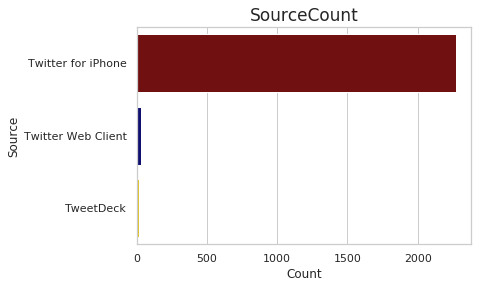

In [128]:
colours = ["maroon", "navy", "gold"]
sns.set(style='whitegrid')
sns.countplot(data=twitter_archive_master,y='source',order=sort,palette=colours)
plt.xticks(rotation=360)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Source",fontsize=12)
plt.title("SourceCount",fontsize=17)
plt.show()

Here we can see the most number of twitter updates are done using i-phone app and then people use the Twitter web_client

In [129]:
## Filtter the numerator that has values less than 15

In [130]:
d2= twitter_archive_master[twitter_archive_master['rating_numerator'] <=15]

In [131]:
d2.head()

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   phineas        NaN   
1                  10     tilly        NaN   
2                  10    archie        NaN   
3                  10     darla        NaN   
4                  10  franklin        NaN   

                                           jpg_url     ...       \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     ...        
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg     ...        
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg     ...        
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg     ...        
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg     ...        

           third_predict_breed prediction3_confidence  predict3_result  \
0                       banana               0.076110            False   
1                     papillon               0.068957             True   
2                       kelpie               0.031379             True   
3                      spatula               0.040836            False   
4  german_short-haired_pointer               0.175219             True   

   favorite_count retweet_count  year  month day      time  day_of_week  
0           39467          8853  2017      8   1  16:23:56         Tues  
1           33819          6514  2017      8   1  00:17:27         Tues  
2           25461          4328  2017      7  31  00:18:03          Mon  
3           42908          8964  2017      7  30  15:58:51          Sun  
4           41048          9774  2017      7  29  16:00:24          Sat  

[5 rows x 27 columns]

In [132]:
### Calculating the ratio of popuarity

In [133]:
d2['popularity']=d2['rating_numerator']/d2['rating_denominator']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
d2.head()

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  \
0                  10   phineas        NaN   
1                  10     tilly        NaN   
2                  10    archie        NaN   
3                  10     darla        NaN   
4                  10  franklin        NaN   

                                           jpg_url     ...      \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     ...       
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg     ...       
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg     ...       
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg     ...       
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg     ...       

   prediction3_confidence predict3_result  favorite_count  retweet_count  \
0                0.076110           False           39467           8853   
1                0.068957            True           33819           6514   
2                0.031379            True           25461           4328   
3                0.040836           False           42908           8964   
4                0.175219            True           41048           9774   

   year  month  day      time  day_of_week  popularity  
0  2017      8    1  16:23:56         Tues         1.3  
1  2017      8    1  00:17:27         Tues         1.3  
2  2017      7   31  00:18:03          Mon         1.2  
3  2017      7   30  15:58:51          Sun         1.3  
4  2017      7   29  16:00:24          Sat         1.2  

[5 rows x 28 columns]

In [135]:
### Analyzing the most famous dog breed in firstprediction
group1 = d2.groupby(['first_predict_breed'],as_index=False).agg({'popularity' :['max']})

In [136]:
d2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'first_predict_breed', 'prediction1_confidence',
       'predict1_result', 'second_predict_breed', 'prediction2_confidence',
       'predict2_result', 'third_predict_breed', 'prediction3_confidence',
       'predict3_result', 'favorite_count', 'retweet_count', 'year', 'month',
       'day', 'time', 'day_of_week', 'popularity'],
      dtype='object')

In [137]:
group1.columns =group1.columns.droplevel(level=1)

In [138]:
group1.sort_values('popularity',ascending=False,inplace=True)

In [139]:
group1.replace('laptop','lapdog',inplace=True)

In [140]:
a = group1.sample(20)

In [141]:
a.sort_values('popularity',ascending=False,inplace=True)

Text(0.5,1,'Type1_Popularity')

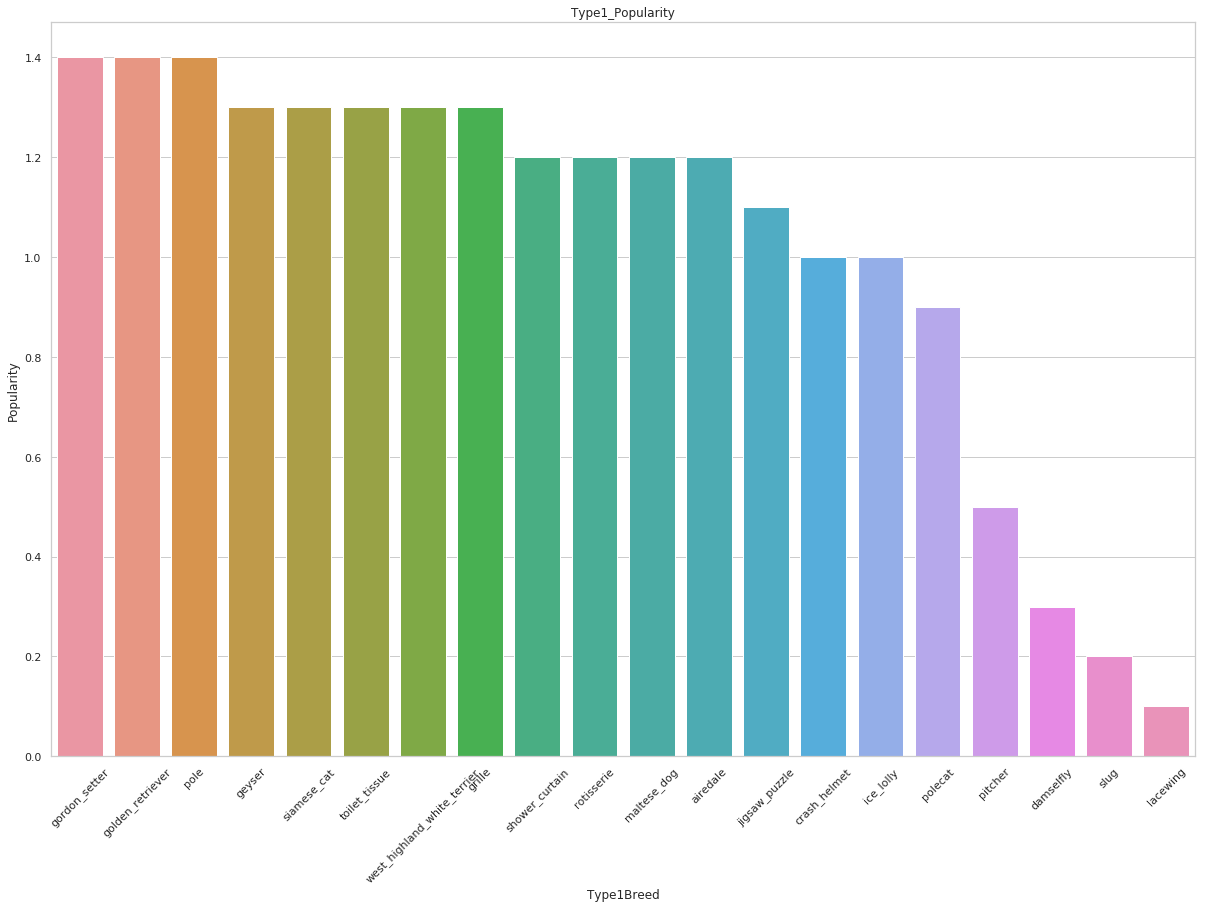

In [142]:
plt.figure(figsize=[20.5,13.5])
sns.barplot(data=a,x='first_predict_breed',y='popularity')
plt.xticks(rotation=45)
plt.xlabel('Type1Breed')
plt.ylabel('Popularity')
plt.title('Type1_Popularity')

The graph above shows the graph of the sample rating from this we can know that rating range's as high as 1.3 to as low apprx 0.2
The values will change as this is based on sample data just to show case the rating trend of the dogs

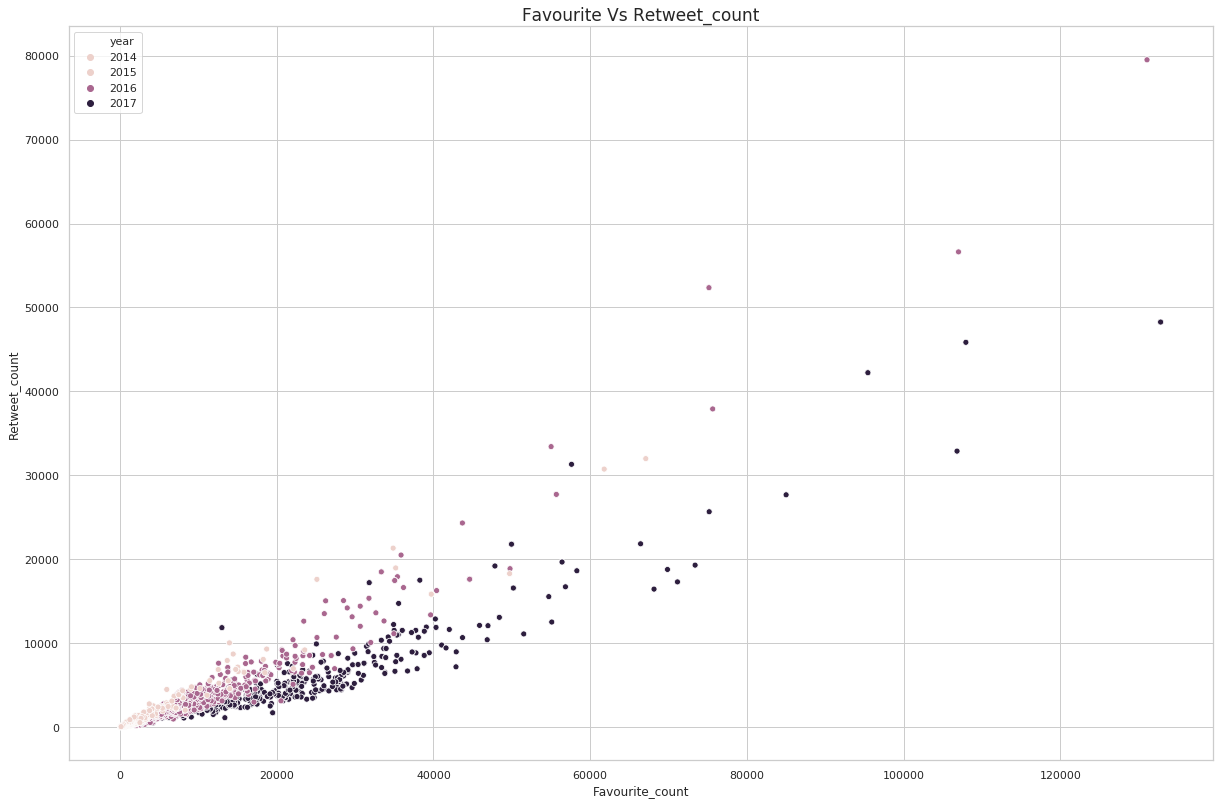

In [143]:
### Analyzing the number of retweet_count and favourite_count based upon year
plt.figure(figsize=[20.5,13.5])
sns.scatterplot(data=twitter_archive_master,x='favorite_count',y='retweet_count',hue='year')
plt.xlabel('Favourite_count',fontsize=12)
plt.ylabel('Retweet_count',fontsize=12)
plt.title('Favourite Vs Retweet_count',fontsize=17)
plt.show()

Here we can see relationship between facourite_count and retweet_Count. The relationship is positive. We can also see that 
most of the values are for all the years are 20000. The maximum value for retweets is 80,000 and maximum value for favourite_count is around 130000

In [144]:
### Analyzing by month
group3= twitter_archive_master.groupby(by=['year','month'],as_index=False).agg({'tweet_id': ['count']})

In [145]:
group3.columns =group3.columns.droplevel(level=1)

In [146]:
group3

year  month  tweet_id
0   2015     11       296
1   2015     12       430
2   2016      1       210
3   2016      2       131
4   2016      3       132
5   2016      4        65
6   2016      5        72
7   2016      6        96
8   2016      7       114
9   2016      8        63
10  2016      9        75
11  2016     10        73
12  2016     11        68
13  2016     12        64
14  2017      1        83
15  2017      2        79
16  2017      3        54
17  2017      4        47
18  2017      5        48
19  2017      6        52
20  2017      7        57
21  2017      8         2

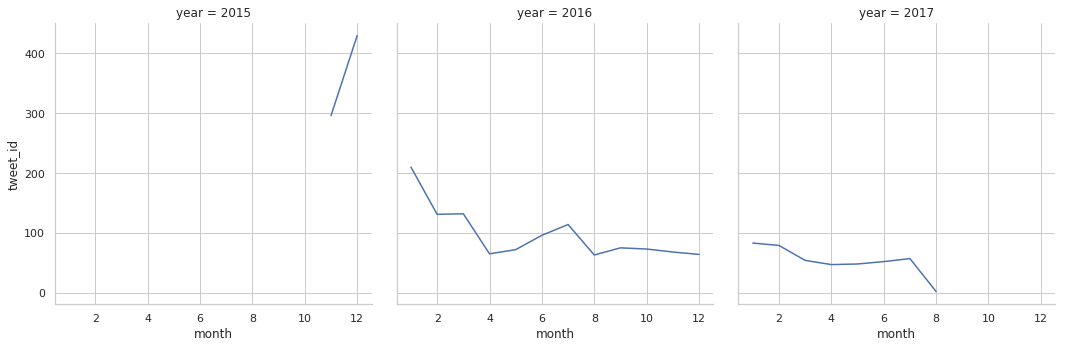

In [147]:
plt.figure(figsize=[20.5,13.5])
sns.relplot(data=group3,x='month',y='tweet_id',kind='line',col='year')


Here we can see the trend of the line graph with counts and the month. We can see that in latter part of 2015 the user count tweeting started increasing and then we can see that in 2016 user count decreased and then in may it started increasing and slowing decreasing again. In 2017 we can see the users that tweeting is reducing

In [148]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'img_num', 'first_predict_breed', 'prediction1_confidence',
       'predict1_result', 'second_predict_breed', 'prediction2_confidence',
       'predict2_result', 'third_predict_breed', 'prediction3_confidence',
       'predict3_result', 'favorite_count', 'retweet_count', 'year', 'month',
       'day', 'time', 'day_of_week'],
      dtype='object')

In [149]:
sot1=twitter_archive_master['dog_stages'].value_counts()

In [151]:
sot1

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stages, dtype: int64

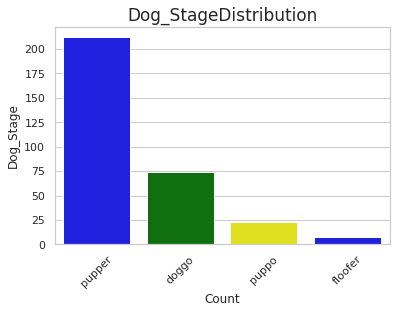

In [156]:
colours = ["blue", "green", "yellow"]
sns.set(style='whitegrid')
sns.countplot(data=twitter_archive_master,x='dog_stages',order=sot1.index,palette=colours)
plt.xticks(rotation=45)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Dog_Stage",fontsize=12)
plt.title("Dog_StageDistribution",fontsize=17)
plt.show()

Here,we can see the distribution of dog stages. It shows that ‘pupper’ (a small doggo, usually younger) is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stage, hence the distrubition might not be true.

##### Image prediction Data Analysis

Text(0.5,1,'Distrubutionplot')

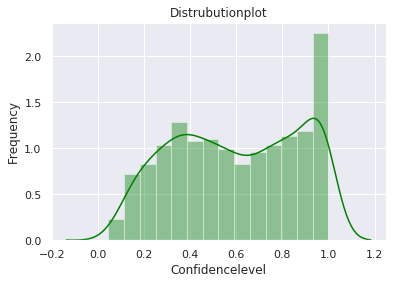

In [166]:
sns.set(style='darkgrid')
sns.set(color_codes=True)
sns.distplot(twitter_archive_master['prediction1_confidence'],color='green')
plt.xlabel('Confidencelevel')
plt.ylabel('Frequency')
plt.title('Distrubutionplot')

In [163]:
sort1=twitter_archive_master['predict1_result'].value_counts()


In [164]:
sort1

True     1715
False     596
Name: predict1_result, dtype: int64

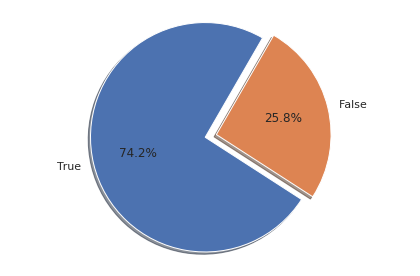

In [165]:
explode = (0.1,0)
fig1,ax1=plt.subplots()
ax1.pie(sort1,explode=explode,labels=sort1.index,autopct='%1.1f%%',shadow=True,startangle=60)
ax1.axis('equal')
plt.tight_layout()
plt.show()

The first plot above shows the prediction success rate of whether or not first prediction is a breed of dog. The pie chart indicates almost 74.2% situations the predictions are correct, even though this result is not good enough for a deep learning model. The second plot shows how confident the algorithm is in its first prediction. We can see 100% is the most cases, however the amounts of 0.1 to 0.8 dominate the entire distribution. That also could suggest that the model is not good enough

### Refrences

1. Youtube [https://www.youtube.com/watch?v=g_Y5NlDBML4]
2. Seaborn Tutorian [http://alanpryorjr.com/visualizations/seaborn/countplot/countplot/]
3. Class notes
4. Twitter API [https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/]